In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load and Explore Digits Dataset
digits = load_digits()
X = digits.data      # 64 features (8x8 image pixels)
y = digits.target    # Digit labels 0–9

print("Original shape:", X.shape)  # (1797, 64)

Original shape: (1797, 64)


In [3]:
# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

print("Reduced shape after PCA:", X_pca.shape)  # (1797, 2)

Reduced shape after PCA: (1797, 2)


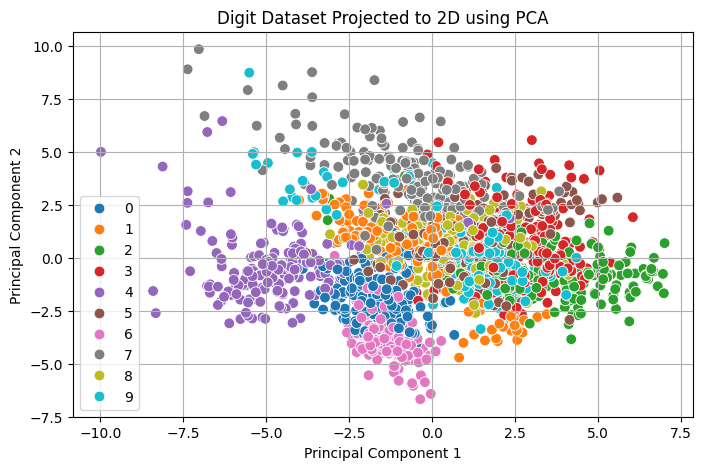

In [5]:
# Visualize 2D PCA Output
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='tab10', legend='full', s=60)
plt.title("Digit Dataset Projected to 2D using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [6]:
# Classification using PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("📈 Classification Accuracy using PCA-reduced data:", round(acc, 2))

📈 Classification Accuracy using PCA-reduced data: 0.54
